In [1]:
# Data processing
import pandas as pd
import numpy as np
from mizani.breaks import date_breaks
from mizani.formatters import date_format

# Data Viz
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
# Read in the data
monthly_trade = pd.read_csv("monthly_trade.csv")
monthly_trade.shape

(4148, 16)

In [3]:
# Explore the data
monthly_trade.head()

,Year,Month,Product Name,Country Name,Volume (kg),Value (USD),Trade Type,Census Country Code,Edible code,FAO Country Code,HTS Number,RFMO,Trade Associations,US Customs District Code,US Customs District Name,Month number
0,2012,January,CATFISH (ICTALURUS) FROZEN,CHINA,"62,230","490,500",IMP,5700,E,156,303240010,CCAMLR,"APEC, CCAMLR, ICCAT",53,"HOUSTON-GALVESTON, TX",1
1,2012,January,CATFISH (PANGASIUS) FROZEN,VIETNAM,"46,720","106,061",IMP,5520,E,704,303240020,NaN,"APEC, ASEAN",27,"LOS ANGELES, CA",1
2,2012,January,CATFISH (PANGASIUS) FROZEN,VIETNAM,"9,117","19,969",IMP,5520,E,704,303240020,NaN,"APEC, ASEAN",52,"MIAMI, FL",1
3,2012,January,CATFISH (PANGASIUS) FILLET FRESH,VIETNAM,"4,798","10,049",IMP,5520,E,704,304320020,NaN,"APEC, ASEAN",7,"OGDENSBURG, NY",1
4,2012,January,"CARP,CATFISH,EELS,SNAKEHEAD MEAT FRESH",CANADA,472,"2,600",IMP,1220,E,124,304510090,NAFO,"APEC, ICCAT, NAFO, NAFTA, OECD",30,"SEATTLE, WA",1


In [4]:
# Reture the data type for each column
monthly_trade.dtypes

Year                         int64
Month                       object
Product Name                object
Country Name                object
Volume (kg)                 object
Value (USD)                 object
Trade Type                  object
Census Country Code          int64
Edible code                 object
FAO Country Code             int64
HTS Number                   int64
RFMO                        object
Trade Associations          object
US Customs District Code     int64
US Customs District Name    object
Month number                 int64
dtype: object

In [5]:
# Adjust the data types
monthly_trade['Volume (kg)'] = monthly_trade['Volume (kg)'].str.replace(',', '').astype(int)
monthly_trade['Value (USD)'] = monthly_trade['Value (USD)'].str.replace(',', '').astype(int)
monthly_trade.dtypes

Year                         int64
Month                       object
Product Name                object
Country Name                object
Volume (kg)                  int64
Value (USD)                  int64
Trade Type                  object
Census Country Code          int64
Edible code                 object
FAO Country Code             int64
HTS Number                   int64
RFMO                        object
Trade Associations          object
US Customs District Code     int64
US Customs District Name    object
Month number                 int64
dtype: object

In [6]:
# Check unique values of Product Name
sorted(monthly_trade['Product Name'].unique())

['CARP,CATFISH,EELS,NILE PERCH,SNAKEHEAD,TILAPIA DRIED',
 'CARP,CATFISH,EELS,NILE PERCH,SNAKEHEAD,TILAPIA FILLET DRIED/SALTED/BRINE',
 'CARP,CATFISH,EELS,NILE PERCH,SNAKEHEAD,TILAPIA SALTED > 6.8 KG',
 'CARP,CATFISH,EELS,NILE PERCH,SNAKEHEAD,TILAPIA SALTED NOT > 6.8KG',
 'CARP,CATFISH,EELS,NILE PERCH,SNAKEHEAD,TILAPIA SMOKED',
 'CARP,CATFISH,EELS,SNAKEHEAD MEAT FRESH',
 'CARP,CATFISH,EELS,SNAKEHEAD,TILAPIA FROZEN NOT > 6.8KG',
 'CARP,CATFISH,EELS,SNAKEHEAD,TILAPIA MEAT FROZEN > 6.8KG',
 'CARP,CATFISH,EELS,SNAKEHEAD,TILAPIA MINCED FROZEN > 6.8KG',
 'CARP,CATFISH,EELS,SNAKEHEAD,TILAPIA SURIMI',
 'CATFISH (ICTALURUS) FILLET FRESH',
 'CATFISH (ICTALURUS) FILLET FROZEN',
 'CATFISH (ICTALURUS) FRESH',
 'CATFISH (ICTALURUS) FROZEN',
 'CATFISH (ICTALURUS) MEAT FRESH',
 'CATFISH (ICTALURUS,PANGASIUS,SILURUS) FRESH NOT > 6.8KG',
 'CATFISH (PANGASIUS) FILLET FRESH',
 'CATFISH (PANGASIUS) FILLET FROZEN',
 'CATFISH (PANGASIUS) FRESH',
 'CATFISH (PANGASIUS) FROZEN',
 'CATFISH (PANGASIUS) MEAT FRESH'

In [7]:
# Remove rows that contain 'CARP,CATFISH,EELS'
monthly_cleaned = monthly_trade[~monthly_trade['Product Name'].str.contains('CARP,CATFISH,EELS')]
monthly_cleaned.shape

(3165, 16)

In [8]:
# Get the indices of 2012 January and February data
index_2012 = monthly_cleaned[(monthly_cleaned['Year']==2012)&
                             (monthly_cleaned['Month number']<=2)].index
  
# Drop the corresponding rows
monthly_cleaned = monthly_cleaned.drop(index_2012).reset_index(drop=True)

# Get the indices of 2020 March to August data
index_2020 = monthly_cleaned[(monthly_cleaned['Year']==2020)&
                            (monthly_cleaned['Month number']>=3)].index
  
# Drop the corresponding rows
monthly_cleaned = monthly_cleaned.drop(index_2020).reset_index(drop=True)

monthly_cleaned

,Year,Month,Product Name,Country Name,Volume (kg),Value (USD),Trade Type,Census Country Code,Edible code,FAO Country Code,HTS Number,RFMO,Trade Associations,US Customs District Code,US Customs District Name,Month number
0,2012,March,CATFISH (PANGASIUS) FROZEN,VIETNAM,73936,204302,IMP,5520,E,704,303240020,NaN,"APEC, ASEAN",27,"LOS ANGELES, CA",3
1,2012,March,CATFISH NSPF FROZEN,VIETNAM,4817,11682,IMP,5520,E,704,303240050,NaN,"APEC, ASEAN",32,"HONOLULU, HI",3
2,2012,March,CATFISH (ICTALURUS) FILLET FRESH,CHINA,15436,137700,IMP,5700,E,156,304320010,CCAMLR,"APEC, CCAMLR, ICCAT",13,"BALTIMORE, MD",3
3,2012,March,CATFISH (ICTALURUS) FILLET FRESH,CHINA,14764,108795,IMP,5700,E,156,304320010,CCAMLR,"APEC, CCAMLR, ICCAT",39,"CHICAGO, IL",3
4,2012,March,CATFISH (PANGASIUS) FILLET FRESH,VIETNAM,226457,697187,IMP,5520,E,704,304320020,NaN,"APEC, ASEAN",27,"LOS ANGELES, CA",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2020,February,CATFISH (SILURIFORMES OTHER) FILLET FROZEN,VIETNAM,947022,2832494,IMP,5520,E,704,304620030,NaN,"APEC, ASEAN",14,"NORFOLK, VA",2
2922,2020,February,CATFISH (SILURIFORMES OTHER) FILLET FROZEN,VIETNAM,31298,86250,IMP,5520,E,704,304620030,NaN,"APEC, ASEAN",17,"SAVANNAH, GA",2
2923,2020,February,CATFISH (SILURIFORMES OTHER) FILLET FROZEN,VIETNAM,251337,812682,IMP,5520,E,704,304620030,NaN,"APEC, ASEAN",18,"TAMPA, FL",2
2924,2020,February,CATFISH (SILURIFORMES OTHER) FILLET FROZEN,VIETNAM,763386,2314817,IMP,5520,E,704,304620030,NaN,"APEC, ASEAN",27,"LOS ANGELES, CA",2


In [9]:
# Save the cleaned dataset
monthly_cleaned.to_csv('monthly_cleaned.csv')

In [10]:
# Sum the volume of import by country
country_import = monthly_cleaned.groupby('Country Name')['Volume (kg)'].sum().reset_index()
country_import

,Country Name,Volume (kg)
0,BANGLADESH,32661
1,BRAZIL,1059045
2,BURMA,150145
3,CANADA,32403
4,CHILE,4808
5,CHINA,44701617
6,CHINA - HONG KONG,1115
7,FRENCH POLYNESIA,7328
8,GREECE,42
9,GUYANA,66150


In [11]:
# Get the indices of Vietnam data
index_vietnam = monthly_cleaned[(monthly_cleaned['Country Name']=='VIETNAM')].index

# Create vietnam_import
vietnam_import = monthly_cleaned.iloc[index_vietnam]
vietnam_import

,Year,Month,Product Name,Country Name,Volume (kg),Value (USD),Trade Type,Census Country Code,Edible code,FAO Country Code,HTS Number,RFMO,Trade Associations,US Customs District Code,US Customs District Name,Month number
0,2012,March,CATFISH (PANGASIUS) FROZEN,VIETNAM,73936,204302,IMP,5520,E,704,303240020,NaN,"APEC, ASEAN",27,"LOS ANGELES, CA",3
1,2012,March,CATFISH NSPF FROZEN,VIETNAM,4817,11682,IMP,5520,E,704,303240050,NaN,"APEC, ASEAN",32,"HONOLULU, HI",3
4,2012,March,CATFISH (PANGASIUS) FILLET FRESH,VIETNAM,226457,697187,IMP,5520,E,704,304320020,NaN,"APEC, ASEAN",27,"LOS ANGELES, CA",3
14,2012,March,CATFISH (PANGASIUS) FILLET FROZEN,VIETNAM,1835539,6692449,IMP,5520,E,704,304620020,NaN,"APEC, ASEAN",10,"NEW YORK, NY",3
15,2012,March,CATFISH (PANGASIUS) FILLET FROZEN,VIETNAM,17963,64871,IMP,5520,E,704,304620020,NaN,"APEC, ASEAN",13,"BALTIMORE, MD",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2020,February,CATFISH (SILURIFORMES OTHER) FILLET FROZEN,VIETNAM,947022,2832494,IMP,5520,E,704,304620030,NaN,"APEC, ASEAN",14,"NORFOLK, VA",2
2922,2020,February,CATFISH (SILURIFORMES OTHER) FILLET FROZEN,VIETNAM,31298,86250,IMP,5520,E,704,304620030,NaN,"APEC, ASEAN",17,"SAVANNAH, GA",2
2923,2020,February,CATFISH (SILURIFORMES OTHER) FILLET FROZEN,VIETNAM,251337,812682,IMP,5520,E,704,304620030,NaN,"APEC, ASEAN",18,"TAMPA, FL",2
2924,2020,February,CATFISH (SILURIFORMES OTHER) FILLET FROZEN,VIETNAM,763386,2314817,IMP,5520,E,704,304620030,NaN,"APEC, ASEAN",27,"LOS ANGELES, CA",2


In [12]:
# Sum the volume of import by Year and Month
vietnam_monthly = vietnam_import.groupby(['Year','Month number'])['Volume (kg)'].sum().reset_index()

# Create a YearMonth column
vietnam_monthly['YearMonth'] = vietnam_monthly['Year'].astype('str') + '/' + vietnam_monthly['Month number'].astype('str')
vietnam_monthly['YearMonth'] = pd.to_datetime(vietnam_monthly['YearMonth'])
# .dt.to_period('M')
vietnam_monthly

,Year,Month number,Volume (kg),YearMonth
0,2012,3,6632419,2012-03-01
1,2012,4,8613628,2012-04-01
2,2012,5,8835628,2012-05-01
3,2012,6,8326763,2012-06-01
4,2012,7,10154460,2012-07-01
...,...,...,...,...
91,2019,10,7222956,2019-10-01
92,2019,11,7658532,2019-11-01
93,2019,12,8196392,2019-12-01
94,2020,1,10173594,2020-01-01


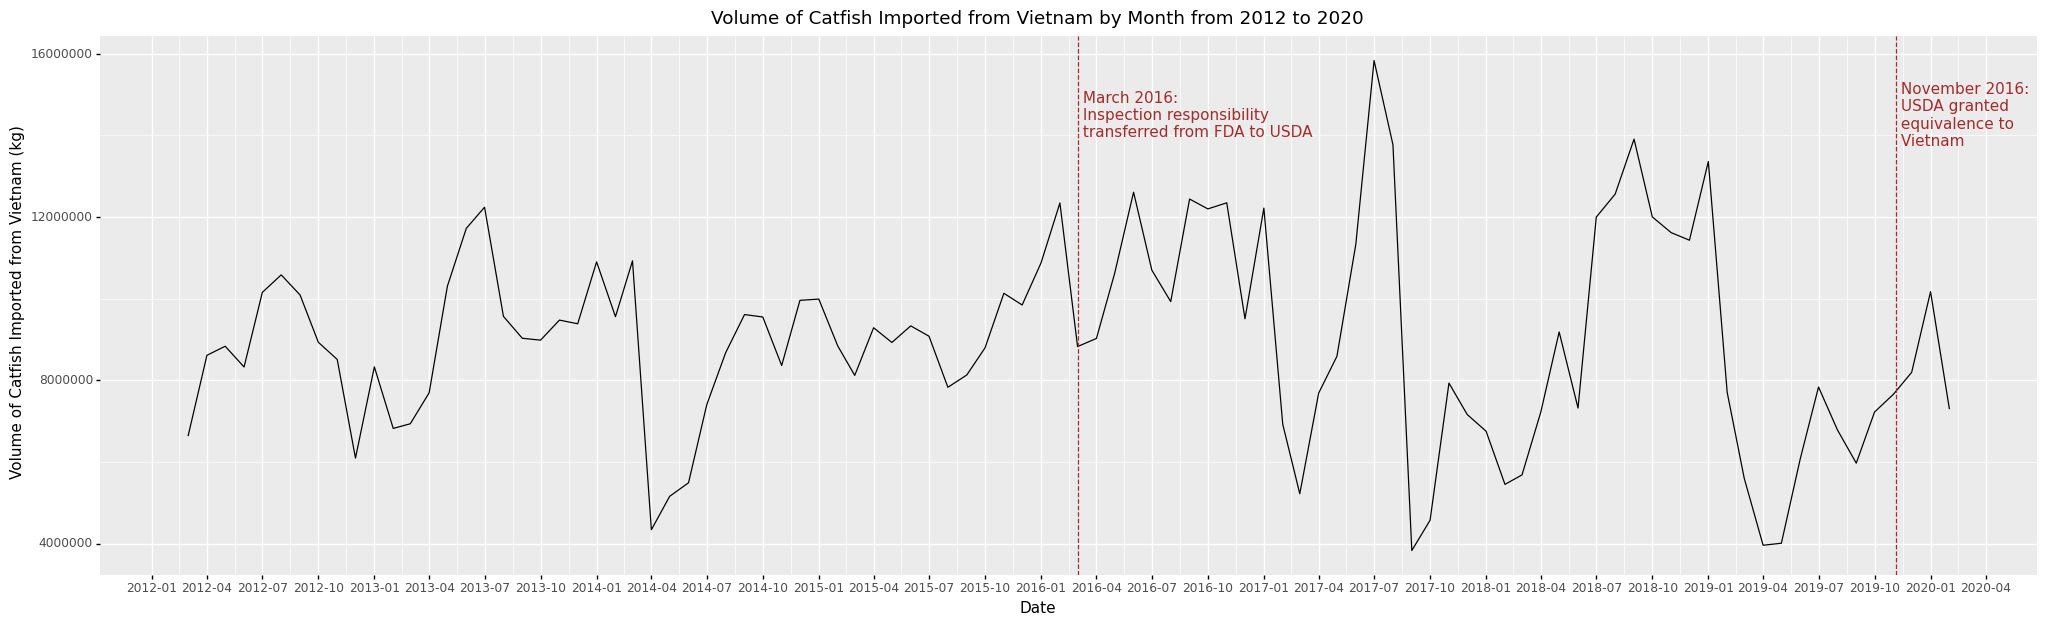

<ggplot: (311199880)>

In [13]:
# Path plot
(
    ggplot(vietnam_monthly,aes('YearMonth','Volume (kg)')) +
    geom_path() +
    geom_vline(xintercept=['2016-03-01','2019-11-05'],
               color='brown',linetype='dashed') +
    annotate('text',
             x=pd.to_datetime('2016-03-01'),y=14500000,
             label=' March 2016:\n Inspection responsibility\n transferred from FDA to USDA',
             color='brown',ha='left') +
    annotate('text',
             x=pd.to_datetime('2019-11-05'),y=14500000,
             label=' November 2016:\n USDA granted\n equivalence to\n Vietnam',
             color='brown',ha='left') +
    labs(title='Volume of Catfish Imported from Vietnam by Month from 2012 to 2020',
         x='Date',y='Volume of Catfish Imported from Vietnam (kg)') +
    scale_x_datetime(breaks=date_breaks('3 months'),
                     labels=date_format('%Y-%m')) +
    theme(axis_text_x=element_text(rotation=0), 
          figure_size=(25,7))
)